In [40]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons 
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
X,y=make_moons(n_samples=250,noise=0.05)
#make_moons generates a synthetic dataset with two interleaving half circles (moons)
#This dataset is non-linearly separable, meaning you can't separate the two classes with a straight line.

X is a 2D NumPy array (or matrix) that contains the feature values for the dataset. Shape: (n_samples, n_features). here (250,2)
y is a 1D NumPy array that contains the class labels (or target values) for each sample in X. Shape: (n_samples,) here(250,)


In [42]:
X

array([[ 5.10333229e-01,  7.72598391e-01],
       [ 1.21119898e+00, -5.62464000e-01],
       [ 1.96672177e+00,  4.28341921e-01],
       [ 1.94579063e-01,  9.82611789e-01],
       [-2.01751539e-01,  9.46294979e-01],
       [-8.81436596e-01,  1.97400916e-01],
       [ 4.65887405e-01, -3.66909215e-01],
       [ 8.92429174e-01, -5.01386750e-01],
       [ 1.49448259e+00, -3.08704614e-01],
       [ 5.75654540e-01,  8.40455344e-01],
       [ 9.93757073e-01,  8.75219932e-03],
       [-8.64988488e-01,  2.61023568e-01],
       [ 4.83702694e-01,  9.33056563e-01],
       [ 3.65227966e-01, -3.77325587e-01],
       [ 1.66172528e+00, -1.59171232e-01],
       [-7.39680166e-01,  5.65222436e-01],
       [ 1.81264591e+00, -4.57307725e-03],
       [ 2.00220248e+00,  3.85190315e-01],
       [ 2.99146097e-02,  2.77717897e-01],
       [ 2.00441866e-01, -1.21695246e-01],
       [-8.07815808e-01,  6.72149866e-01],
       [ 1.80551151e+00, -1.28259357e-01],
       [-2.41379139e-02,  1.99324980e-01],
       [ 1.

In [43]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1])

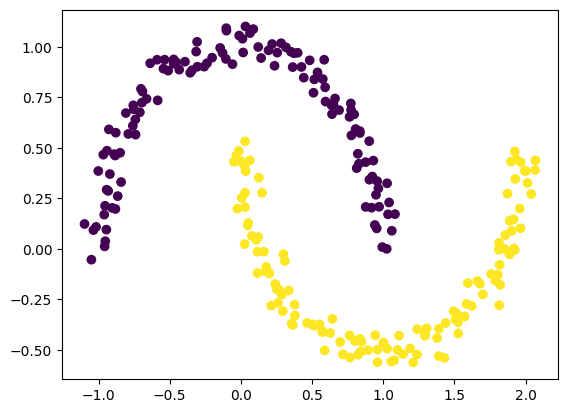

In [44]:
plt.scatter(X[:,0],X[:,1],c=y)

#to cluster this data point ,in dbscan we use epsilon.

In [45]:
#standardisation
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X_scaled

array([[ 1.18031314e-02,  1.04290095e+00],
       [ 8.18536465e-01, -1.62719701e+00],
       [ 1.68818293e+00,  3.54394926e-01],
       [-3.51646519e-01,  1.46292353e+00],
       [-8.07843886e-01,  1.39029064e+00],
       [-1.59019713e+00, -1.07482443e-01],
       [-3.93563492e-02, -1.23609137e+00],
       [ 4.51615659e-01, -1.50504374e+00],
       [ 1.14461080e+00, -1.11968334e+00],
       [ 8.69913950e-02,  1.17861349e+00],
       [ 5.68249400e-01, -4.84776087e-01],
       [-1.57126450e+00,  1.97615818e-02],
       [-1.88500153e-02,  1.36381407e+00],
       [-1.55220658e-01, -1.25692390e+00],
       [ 1.33711593e+00, -8.20619576e-01],
       [-1.42702803e+00,  6.28153206e-01],
       [ 1.51083352e+00, -5.11426373e-01],
       [ 1.72902310e+00,  2.68092581e-01],
       [-5.41183965e-01,  5.31499036e-02],
       [-3.44898125e-01, -7.45668357e-01],
       [-1.50545573e+00,  8.42005918e-01],
       [ 1.50262145e+00, -7.58796448e-01],
       [-6.03401263e-01, -1.03634355e-01],
       [ 6.

In [46]:
#apply DBSCAN
dbscan=DBSCAN(eps=0.3)
dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [47]:
dbscan.labels_

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1])

Text(0, 0.5, 'Feature 2')

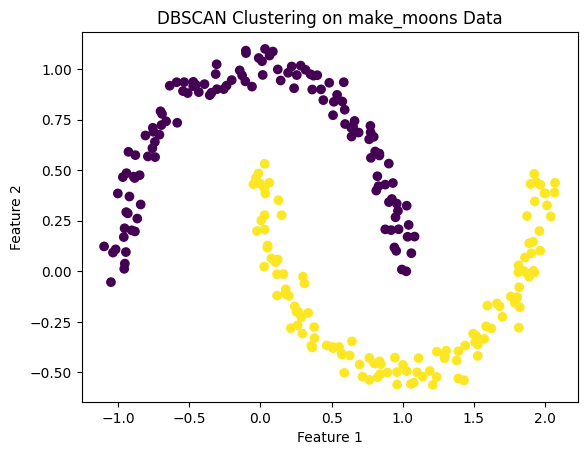

In [49]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)
plt.title("DBSCAN Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")